In [1]:
%matplotlib inline
import helper
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Análise de algoritmos de busca no problema *Sliding puzzle*

_**Resumo:** Este relatório apresenta uma análise comparativa de tempo de algorimos de busca no problema **Sliding Puzzle**, também conhecido como quebra cabeça de oito peças. Após uma descrição na introdução de como o trabalho foi desenvolvido, serão apresentados gráficos dos resultados e, por fim, uma breve discussão dos resultados._

## 1. Introdução

Serão analisados algoritmos de busca no problema **Sliding Puzzle**, buscando demonstrar a importância do uso de algoritmos que utilizam heurísticas para problemas de resolução de problemas por meio de busca.

### 1.1 Sliding Puzzle

Também conhecido como *Quebra cabeças de 8* ou *15 peças*, o jogo consiste em mover as peças do quebra-cabeças nos sentidos horizontais/verticais para organizá-las em uma ordem lógica (de 1 a 8 da esquerda para a direita).

![](https://lh4.ggpht.com/Ecfnwr4gn39lt3tU1FrK2n4kI_IZ-rJmezE3_hI5gGeeDMnioDwghAT0F5Bk95tNtQ=w300)

### 1.2. Algoritmos testados

Foram implementados e testados os seguintes algoritmos de busca:

 * Busca em largura/extensão;
 * Busca em profunidade grafo (não caminhos repetidos);
 * Busca em profundidade limitada;
 * Busca em aprofundamento interativo;
 * Busca A\* (A star): Heurística Distância Quarteirão;
 * Busca A\* (A star): Heurística de total de blocos em posição errada.

A medida que o campo aumenta, o custo de tempo de alguns algoritmos aumenta drasticamente. Desta forma, foi escolhido retirar alguns algoritmos da análise a partir de uma configuração de tamanho $3x3$.

## 2. Método de análise

Os algorimos de busca foram testados $10$ (dez) vezes a partir de um estado aleatório inicial. 

Para cada teste, foram computados o tempo inicial e o tempo final da execução de um algoritmo de busca. O tempo utilizado foi o **tempo do processo**, de forma a evitar a adição de tempo que o processo está em _Sleep status_.

> **```time.process_time()```**

> Return the value (in fractional seconds) of the sum of the system and user CPU time of the current process. It does not include time elapsed during sleep. It is process-wide by definition. The reference point of the returned value is undefined, so that only the difference between the results of consecutive calls is valid.

> -- <cite>[Python documentation](https://docs.python.org/3.5/library/time.html#time.process_time) - 2017</cite>

O estado inicial foi definido antes da execução dos algoritmos de busca: foram realizadas 150 movimentos aleatórios a partir do estado objetivo.

```python
def shuffle(puzzle, n):
    last_movement = SlidingMovement.FROM_BOTTOM
    while n > 0:
        movement = random.choice(puzzle.possible_movements)
        # Não desfazer o movimento anterior
        if movement == ~last_movement:
            continue

        puzzle.move(movement)

        last_movement = movement
        n -= 1
```

Para facilitar a implementação, **o estado objetivo** foi definido como a sequência $[0 .. (largura*altura - 1)]$.

### 2.1 Configurações de testes

As configurações de tamanho do quebra cabeça são

* 2 x 2
* 2 x 3
* 3 x 3 - Quebra cabeças de 8 peças
* 3 x 4
* 4 x 4 - Quebra cabeças de 16 peças

### 2.2 Ambiente de testes

Foi utilizado um Notebook com as seguintes características:

* **Memória RAM**: 7,7 GiB
* **Processador**: Intel® Core™ i5-5200U CPU @ 2.20GHz × 4 
* **Sistema Operacional**: Ubuntu 16.04 LTS - 64-bit

### 2.3 Linguagem de programação

O código foi implementado com a linguagem Python versão 3.5.2 - distribuição Anaconda 4.2.0 (64-bit).

Para a manipulação de arrays, foi utilizada a biblioteca [NumPy](http://www.numpy.org/) "o pacote fundamenta para computação científica em Python" (NumPy 2017).

O código pode ser encontrado no repositório oficial do projeto: https://github.com/IFCE-Ciencia-da-Computacao-2011-2/UDM.279-Inteligencia-Artificial

## 3. Resultados

A análise dos dados consiste basicamente a partir da média das execuções. Foi percebido que aleatoriamente algoritmos apresentaram um desvio padrão alto, ocasionado por demoras excessivas em uma única das execuções. A fim de amenizar o problema, considerou ser mais justo remover da análise a execução mais rápida e a mais lenta.

### 3.1 Tamanho:  (2, 2)

* **Estado inicial**:
```
[[3 2]
 [1 0]]
```
* **Mínimo de movimentos para solucionar**: 6

Nesta configuração, o melhor resultado analisando o tempo de execução foi a busca em profundidade. Apesar de este 

In [8]:
data = helper.carregar_json('data.json')

resultado_2_x_2 = helper.processar_resultados(data['(2, 2)'])
resultado_2_x_2[0].head(3)

,A* - Distância quarteirão,Profundidade (grafo),Profundidade limitada - 15,Largura,Aprofundamento Interativo,A* - Nº errados
0,0.000999,0.000392,0.001781,0.000786,0.002873,0.000768
1,0.001007,0.000393,0.001785,0.000792,0.002917,0.000770
2,0.001021,0.000394,0.001795,0.000825,0.002923,0.000776


In [3]:
print("Total de passos para a solução")
resultado_2_x_2[1]

Total de passos para a solução


,A* - Distância quarteirão,Profundidade (grafo),Profundidade limitada - 15,Largura,Aprofundamento Interativo,A* - Nº errados
0,6,6,14,6,6,6


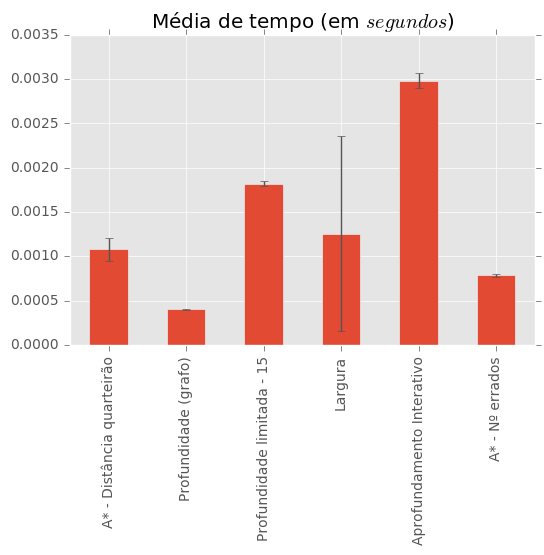

In [4]:
helper.grafico_desvio_padrao(resultado_2_x_2[0])

### 3.2 Tamanho: (2, 3)

* **Estado inicial**:
```
[[5 2]
 [4 3]
 [0 1]]
```
* **Mínimo de movimentos para solucionar**: 14

In [10]:
resultado_2_x_3 = helper.processar_resultados(data['(2, 3)'])
resultado_2_x_3[0].head(3)

,A* - Distância quarteirão,Profundidade (grafo),Profundidade limitada - 15,Largura,Aprofundamento Interativo,A* - Nº errados
0,0.008430,0.153690,6.108250,0.167027,6.572430,0.008007
1,0.008441,0.153939,6.136186,0.167370,6.595261,0.008053
2,0.008868,0.155745,6.159544,0.168769,6.657200,0.008742


In [9]:
print("Total de passos para a solução")
resultado_2_x_3[1]

Total de passos para a solução


,A* - Distância quarteirão,Profundidade (grafo),Profundidade limitada - 15,Largura,Aprofundamento Interativo,A* - Nº errados
0,14,118,14,14,14,14


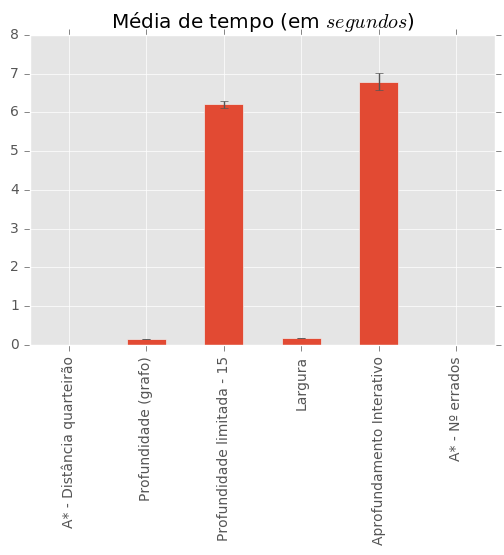

In [7]:
helper.grafico_desvio_padrao(resultado_2_x_3[0])